In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# EDA & Data Visualization

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df = df.rename({'R&D Spend':'RDS','Administration':'ADMIN','Marketing Spend':'MKTS'}, axis = 1);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,RDS,ADMIN,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


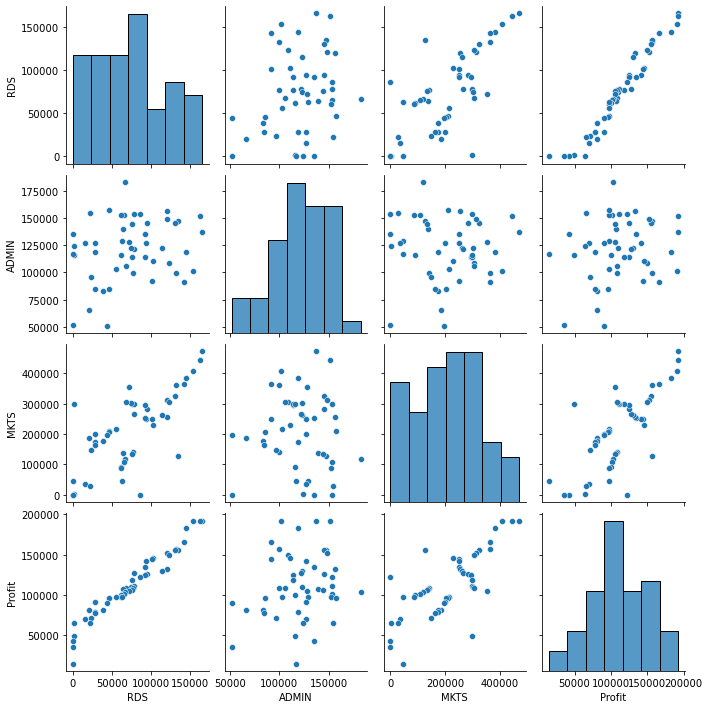

In [7]:
sns.pairplot(df);

# Correlation

In [8]:
df.corr()

,RDS,ADMIN,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Instantiating & Fitting the Model

In [9]:
model = smf.ols("Profit~RDS+ADMIN+MKTS", data = df).fit()

# Parameter Estimates


In [10]:
model.params.round(2)

Intercept    50122.19
RDS              0.81
ADMIN           -0.03
MKTS             0.03
dtype: float64

In [11]:
model.tvalues.round(2), model.pvalues.round(3)

(Intercept     7.63
 RDS          17.85
 ADMIN        -0.53
 MKTS          1.66
 dtype: float64,
 Intercept    0.000
 RDS          0.000
 ADMIN        0.602
 MKTS         0.105
 dtype: float64)

In [12]:
model.rsquared.round(3) , model.rsquared_adj.round(3)

(0.951, 0.948)

In [13]:
SLR_A = smf.ols("Profit~ADMIN",data=df).fit()
SLR_A.tvalues , SLR_A.pvalues

(Intercept    3.040044
 ADMIN        1.419493
 dtype: float64,
 Intercept    0.003824
 ADMIN        0.162217
 dtype: float64)

In [14]:
SLR_M = smf.ols("Profit~MKTS",data=df).fit()
SLR_M.tvalues , SLR_M.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [15]:
MLR = smf.ols("Profit~ADMIN+MKTS",data=df).fit()
MLR.tvalues , MLR.pvalues

(Intercept    1.142741
 ADMIN        2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMIN        1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation

1) Collinearity Check

In [16]:
RSQ_R = smf.ols("RDS~ADMIN+MKTS", data = df).fit().rsquared
VIF_R = 1 / (1 - RSQ_R)

RSQ_A = smf.ols("ADMIN~RDS+MKTS", data = df).fit().rsquared
VIF_A = 1 / (1 - RSQ_A)

RSQ_M = smf.ols("MKTS~RDS+ADMIN", data = df).fit().rsquared
VIF_M = 1 / (1 - RSQ_M)

# Putting the values in Dataframe format
VIF = {'Variables':['RDS','ADMS','MKTS'],'Vif':[VIF_R, VIF_A, VIF_M]}
VIF_DF=pd.DataFrame(VIF)
VIF_DF.round(2)

,Variables,Vif
0,RDS,2.47
1,ADMS,1.18
2,MKTS,2.33


None variable has VIF > 20. No Collinearity so consider all varaibles in Regression equation.

2) Residual Analysis

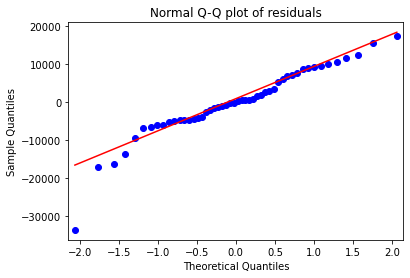

In [17]:
sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
np.where(model.resid < -30000)

(array([49], dtype=int64),)

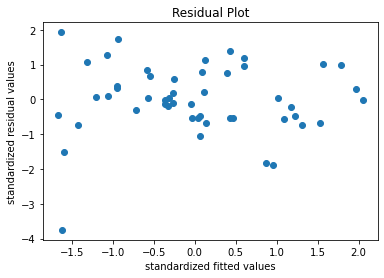

In [19]:
def std_values(vals):
    return (vals-vals.mean())/vals.std()

plt.scatter(std_values(model.fittedvalues),std_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

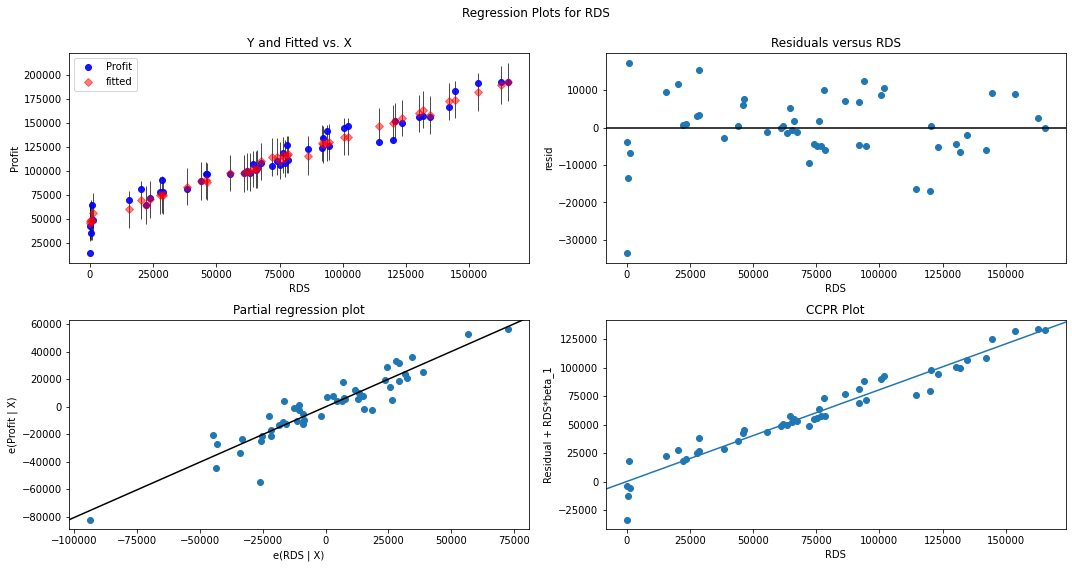

In [20]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig = fig)
plt.show()

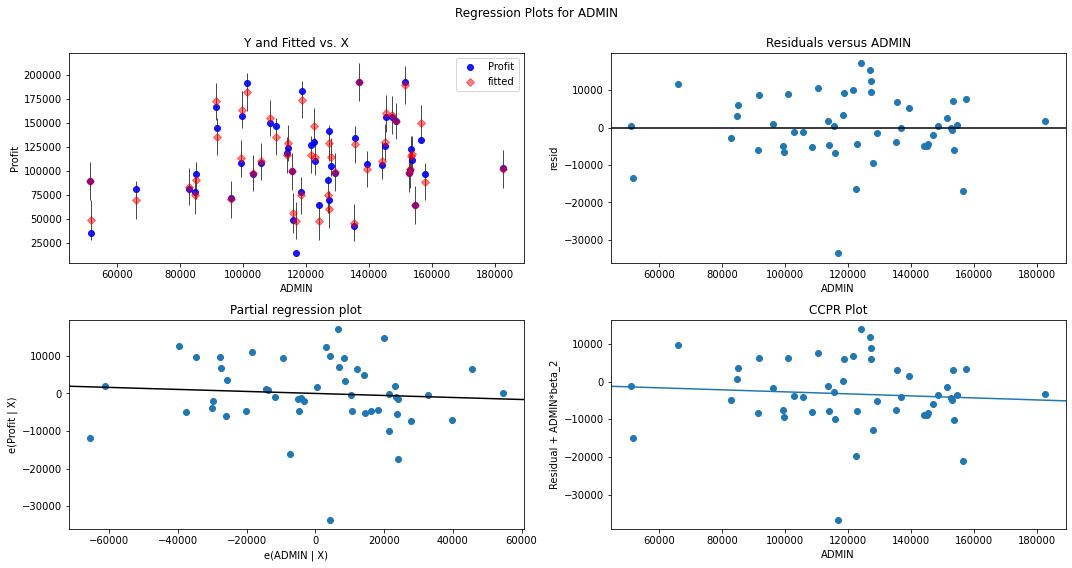

In [21]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'ADMIN',fig = fig)
plt.show()

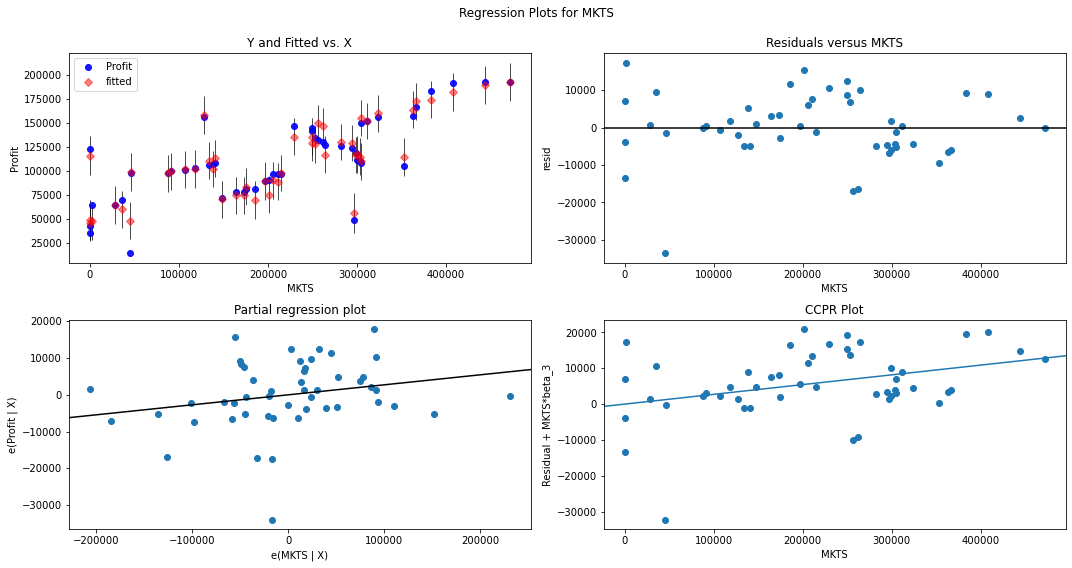

In [22]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig = fig)
plt.show()

# Model Deletion Diagnostics

1) Cook's Distance

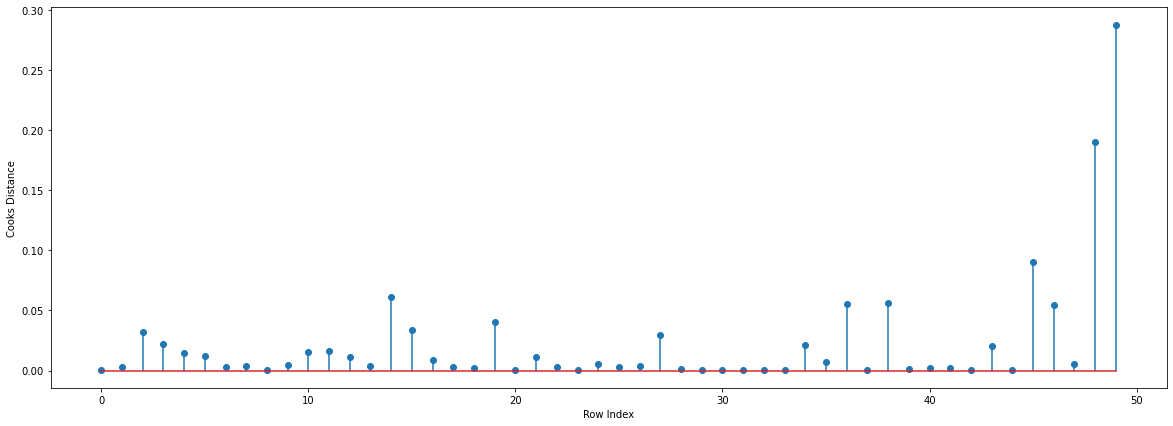

In [23]:
(c,_) = model.get_influence().cooks_distance
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

2) Leverage value

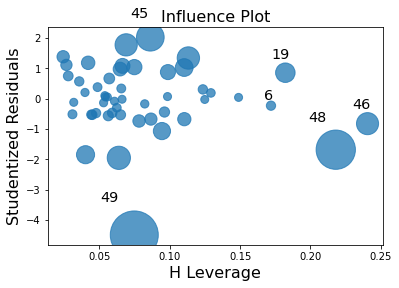

In [25]:
influence_plot(model)
plt.show()

In [26]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [27]:
df[df.index.isin([49])]

,RDS,ADMIN,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [28]:
df1 = df.drop(df.index[[49]],axis = 0).reset_index(drop = True)
final_model = smf.ols("Profit~RDS+ADMIN+MKTS",data = df1).fit()
print("Accuracy of Model is improved to",final_model.rsquared.round(3))

Accuracy of Model is improved to 0.961


# Prediction

In [29]:
test_data = pd.DataFrame({'RDS':70000,"ADMIN":90000,"MKTS":140000},index = [0])

In [30]:
final_model.predict(test_data)

0    108727.154753
dtype: float64

# R^2 Value Table

In [31]:
table = {'Models':['Initial','Final'],'Rsquared':[model.rsquared,final_model.rsquared]}
pd.DataFrame(table)

,Models,Rsquared
0,Initial,0.950746
1,Final,0.961316
